In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras.initializers import RandomNormal,glorot_uniform,he_normal

Using TensorFlow backend.


In [ ]:
batch_size = 128
num_classes = 10
epochs = 20

In [ ]:
img_rows, img_cols = 28, 28

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Dropout(0.4))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 77s 1ms/step - loss: 0.3653 - acc: 0.8839 - val_loss: 0.0733 - val_acc: 0.9776
Epoch 2/20
60000/60000 [==============================] - 76s 1ms/step - loss: 0.1235 - acc: 0.9626 - val_loss: 0.0465 - val_acc: 0.9851
Epoch 3/20
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0870 - acc: 0.9747 - val_loss: 0.0340 - val_acc: 0.9894
Epoch 4/20
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0704 - acc: 0.9790 - val_loss: 0.0318 - val_acc: 0.9889
Epoch 5/20
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0609 - acc: 0.9816 - val_loss: 0.0280 - val_acc: 0.9900
Epoch 6/20
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0560 - acc: 0.9831 - val_loss: 0.0240 - val_acc: 0.9929
Epoch 7/20
60000/60000 [========

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.014880029714351258
Test accuracy: 0.995


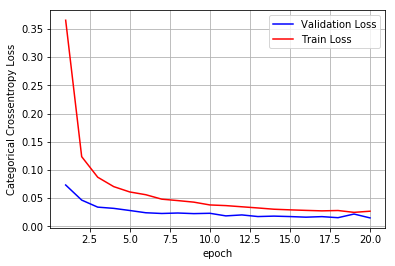

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')


x = list(range(1,epochs+1))
vy = model.history.history['val_loss']
ty = model.history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
batch_size = 100
num_classes = 10
epochs = 20

In [ ]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Dropout(0.25))
model.add(Conv2D(16, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(16, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(108, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 338s 6ms/step - loss: 0.8038 - acc: 0.7488 - val_loss: 0.0958 - val_acc: 0.9708
Epoch 2/20
60000/60000 [==============================] - 337s 6ms/step - loss: 0.2160 - acc: 0.9374 - val_loss: 0.0652 - val_acc: 0.9782
Epoch 3/20
60000/60000 [==============================] - 337s 6ms/step - loss: 0.1591 - acc: 0.9557 - val_loss: 0.0520 - val_acc: 0.9848
Epoch 4/20
60000/60000 [==============================] - 336s 6ms/step - loss: 0.1315 - acc: 0.9628 - val_loss: 0.0410 - val_acc: 0.9869
Epoch 5/20
60000/60000 [==============================] - 335s 6ms/step - loss: 0.1134 - acc: 0.9679 - val_loss: 0.0412 - val_acc: 0.9886
Epoch 6/20
60000/60000 [==============================] - 335s 6ms/step - loss: 0.0989 - acc: 0.9723 - val_loss: 0.0341 - val_acc: 0.9888
Epoch 7/20
60000/60000 [==============================] - 335s 6ms/step - loss: 0.0932 - acc: 0.9736 - val_loss: 0.0412 - 

Test score: 0.02594771668177127
Test accuracy: 0.9927


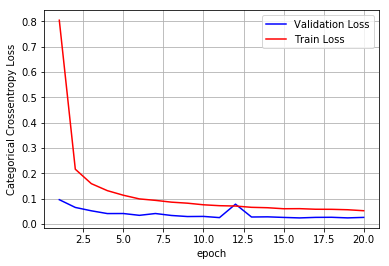

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')


x = list(range(1,epochs+1))
vy = model.history.history['val_loss']
ty = model.history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
batch_size = 120
num_classes = 10
epochs = 20

In [ ]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Dropout(0.25))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(16, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(108, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.










In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 593s 10ms/step - loss: 13.3138 - acc: 0.1292 - val_loss: 14.4918 - val_acc: 0.1009
Epoch 2/20
60000/60000 [==============================] - 597s 10ms/step - loss: 14.0866 - acc: 0.1260 - val_loss: 14.3282 - val_acc: 0.1108
Epoch 3/20
60000/60000 [==============================] - 587s 10ms/step - loss: 13.7995 - acc: 0.1438 - val_loss: 12.7897 - val_acc: 0.2065
Epoch 4/20
60000/60000 [==============================] - 578s 10ms/step - loss: 13.7044 - acc: 0.1496 - val_loss: 12.6945 - val_acc: 0.2124
Epoch 5/20
60000/60000 [==============================] - 598s 10ms/step - loss: 13.6083 - acc: 0.1557 - val_loss: 12.8623 - val_acc: 0.2020
Epoch 6/20
60000/60000 [==============================] - 593s 10ms/step - loss: 13.6038 - acc: 0.1560 - val_loss: 12.6694 - val_acc: 0.2139
Epoch 

Test score: 13.36028929901123
Test accuracy: 0.1711


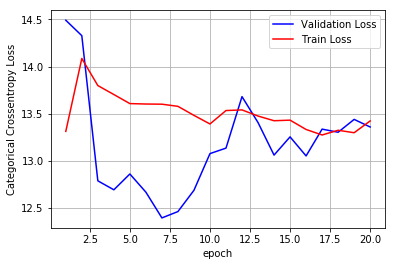

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')


x = list(range(1,epochs+1))
vy = model.history.history['val_loss']
ty = model.history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
batch_size = 128
num_classes = 10
epochs = 20

In [ ]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='sigmoid',kernel_initializer=he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Conv2D(64, (2, 2), activation='sigmoid',kernel_initializer=glorot_uniform(seed=None)))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer=he_normal(seed=None)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))










Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(),metrics=['accuracy'])

model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 86s 1ms/step - loss: 0.7448 - acc: 0.8641 - val_loss: 0.1046 - val_acc: 0.9673
Epoch 2/20
60000/60000 [==============================] - 86s 1ms/step - loss: 0.1889 - acc: 0.9462 - val_loss: 0.0663 - val_acc: 0.9802
Epoch 3/20
60000/60000 [==============================] - 86s 1ms/step - loss: 0.1552 - acc: 0.9570 - val_loss: 0.0557 - val_acc: 0.9827
Epoch 4/20
60000/60000 [==============================] - 86s 1ms/step - loss: 0.1340 - acc: 0.9637 - val_loss: 0.0528 - val_acc: 0.9837
Epoch 5/20
60000/60000 [==============================] - 85s 1ms/step - loss: 0.1213 - acc: 0.9658 - val_loss: 0.0446 - val_acc: 0.9858
Epoch 6/20
60000/60000 [==============================] - 86s 1ms/step - loss: 0.1143 - acc: 0.9681 - val_loss: 0.0428 - val_acc: 0.9865
Epoch 7/20
60000/60000 [======

Test score: 0.029566198530299154
Test accuracy: 0.9899


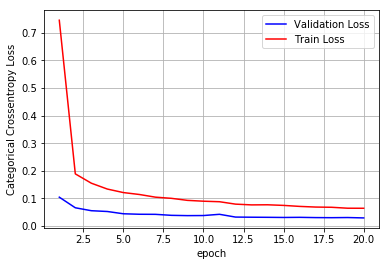

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')


x = list(range(1,epochs+1))
vy = model.history.history['val_loss']
ty = model.history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
batch_size = 100
num_classes = 10
epochs = 20

In [ ]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(16, (2, 2), activation='softmax',kernel_initializer=he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer=glorot_uniform(seed=None)))
model.add(BatchNormalization())
model.add(Conv2D(16, (2, 2), activation='softmax',kernel_initializer=he_normal(seed=None)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(108, activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 471s 8ms/step - loss: 1.6993 - acc: 0.5738 - val_loss: 1.1953 - val_acc: 0.9780
Epoch 2/20
60000/60000 [==============================] - 470s 8ms/step - loss: 1.3000 - acc: 0.5541 - val_loss: 0.8264 - val_acc: 0.9855
Epoch 3/20
60000/60000 [==============================] - 468s 8ms/step - loss: 1.2232 - acc: 0.5642 - val_loss: 0.6865 - val_acc: 0.9889
Epoch 4/20
60000/60000 [==============================] - 471s 8ms/step - loss: 1.1482 - acc: 0.6047 - val_loss: 0.5421 - val_acc: 0.9866
Epoch 5/20
60000/60000 [==============================] - 473s 8ms/step - loss: 1.0363 - acc: 0.6434 - val_loss: 0.4023 - val_acc: 0.9885
Epoch 6/20
60000/60000 [==============================] - 475s 8ms/step - loss: 0.9638 - acc: 0.6723 - val_loss: 0.3129 - val_acc: 0.9894
Epoch 7/20
60000/60000 [

Test score: 0.04044302058815956
Test accuracy: 0.9922


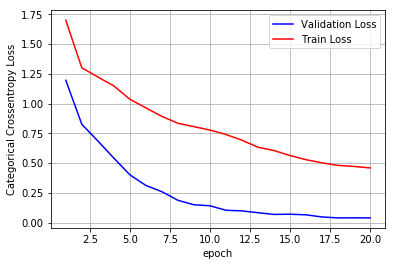

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')


x = list(range(1,epochs+1))
vy = model.history.history['val_loss']
ty = model.history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
batch_size = 128
num_classes = 10
epochs = 20

In [ ]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='sigmoid',kernel_initializer=he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Conv2D(64, (2, 2), activation='sigmoid',kernel_initializer=glorot_uniform(seed=None)))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer=he_normal(seed=None)))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 93s 2ms/step - loss: 0.3719 - acc: 0.8920 - val_loss: 0.1510 - val_acc: 0.9533
Epoch 2/20
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0696 - acc: 0.9797 - val_loss: 0.0721 - val_acc: 0.9765
Epoch 3/20
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0511 - acc: 0.9845 - val_loss: 0.0702 - val_acc: 0.9772
Epoch 4/20
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0409 - acc: 0.9871 - val_loss: 0.0656 - val_acc: 0.9800
Epoch 5/20
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0354 - acc: 0.9889 - val_loss: 0.0367 - val_acc: 0.9878
Epoch 6/20
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0319 - acc: 0.9896 - val_loss: 0.0434 - val_acc: 0.9867
Epoch 7/20
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0288 - acc: 0.9908 - val_loss: 0.0499 - val_acc

Test score: 0.03922282522960559
Test accuracy: 0.9901


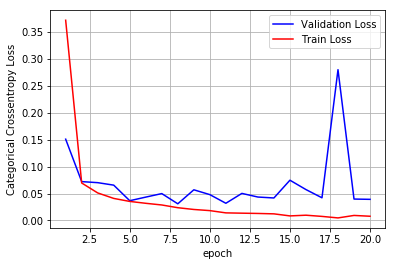

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')


x = list(range(1,epochs+1))
vy = model.history.history['val_loss']
ty = model.history.history['loss']
plt_dynamic(x, vy, ty, ax)

# conclusion

1.CNN converge fast as compared with normal Neural Networks.

2.For 5_layer CNN dosen't work well.

3.It takes too long time to train than normal Neural Networks

4.I think that for simple dataset we use appropriate no. of layers or small no. of layers if we increase,then accuracy also decrease

5.Because no. of convolution layers also one of the hyperparameter.

In [ ]:
from prettytable import PrettyTable
CNN_table = PrettyTable()
CNN_table.field_names = ['model','accuracy','loss']
CNN_table.add_row(['2_LAYER CNNETWORK',0.9950,0.0149])
CNN_table.add_row(['3_LAYER CNNETWORK',0.9927,0.0259])
CNN_table.add_row(['5_LAYER CNNETWORK',0.1711,13.3602])
print(CNN_table)

+-------------------+----------+---------+
|       model       | accuracy |   loss  |
+-------------------+----------+---------+
| 2_LAYER CNNETWORK |  0.995   |  0.0149 |
| 3_LAYER CNNETWORK |  0.9927  |  0.0259 |
| 5_LAYER CNNETWORK |  0.1711  | 13.3602 |
+-------------------+----------+---------+


# CNN with DIFFERENT INTILALIZERS,BATCH NORMALIZTIONS,DROPOUTS,OPTIMIZZERS

In [ ]:
from prettytable import PrettyTable
CNN_table = PrettyTable()
CNN_table.field_names = ['model','accuracy','loss']
CNN_table.add_row(['2_LAYER CNNETWORK',0.9899,0.0295])
CNN_table.add_row(['3_LAYER CNNETWORK',0.9927,0.0404])
CNN_table.add_row(['2_LAYER CNNETWORK',0.9901,0.0392])
print(CNN_table)

+-------------------+----------+--------+
|       model       | accuracy |  loss  |
+-------------------+----------+--------+
| 2_LAYER CNNETWORK |  0.9899  | 0.0295 |
| 3_LAYER CNNETWORK |  0.9927  | 0.0404 |
| 2_LAYER CNNETWORK |  0.9901  | 0.0392 |
+-------------------+----------+--------+
